In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[0.00011647843751164786, 0.00012000074546200006, 0.00012635580901263556, 0.00013334451526333444]
14.479999999999976
[0.00010950091319095008, 0.00011282567371128258, 0.00011872041447687203, 0.00012287077416228709]
12.209816869766508
[0.00010529725297252974, 0.00010786965596928698, 0.0001126821722762682, 0.00011766390845726639]
11.744518622876988


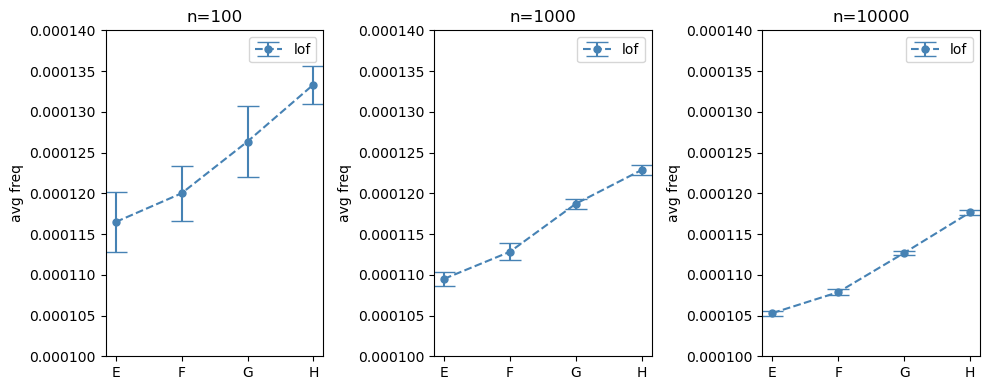

In [64]:
### SUM STATS ###

w_list_pca = ['0.0015','0.0025','0.005']
center_pca='centerX19Y4'
vartypes = ['lof']#['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
lt=['-','dotted','--']
labels = ['E','F','G','H']
reps=np.arange(10)+1
n_list=[100,1000,10000]
colors_vt = ['steelblue','orchid','darkorange']
fig,axs = plt.subplots(1,3,figsize=(10,4))

for i,n in enumerate(n_list):
    for c,vt in enumerate(vartypes):
        
        means = []
        errors = []
    
        for idx, w in enumerate(w_list_pca+['uniformpca']):
            sfs_file = f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_{center_pca}pca{w}_nSIR{n}_nSIRreps10.SIRsfs' if w != 'uniformpca' else f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_uniformpca_nSIR{n}_nSIRreps10.SIRsfs'
            sfs = pd.read_csv(sfs_file, delimiter=' ')
    
            # Average Frequency 
            frequency_contributions = []
            for rep in reps:
                contributions = sfs[(sfs['SIR_REP'] == rep)]
                
                p = contributions['OBS_N'] / n
                weighted_frequency = (p * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                # print(weighted_frequency)
                frequency_contributions.append(weighted_frequency)
            current_mean = np.mean(frequency_contributions)
            means.append(current_mean)
            errors.append(np.std(frequency_contributions))  
        print(means)
        axs[i].errorbar(labels, means, yerr=errors, capsize=8, markersize=5, fmt='o',linestyle='--',color=colors_vt[c],label=vt)
        axs[i].legend()
        axs[i].set_title(f'n={n}')
        axs[i].set_ylim(0.0001,0.00014)
        axs[i].set_ylabel('avg freq')
        print(((means[-1]-means[0])/means[0])*100)

plt.tight_layout()
plt.show()

[0.00010529725297252974, 0.00010786965596928698, 0.0001126821722762682, 0.00011766390845726639]
11.744518622876988
[0.00014815759066681578, 0.00014526463901002646, 0.00013521767490402178, 0.00011766390845726639]
-20.581923661356715
[9.976760222147677e-05, 9.936747549293674e-05, 0.00010212344850721232, 0.00011766390845726639]
17.937993734740797


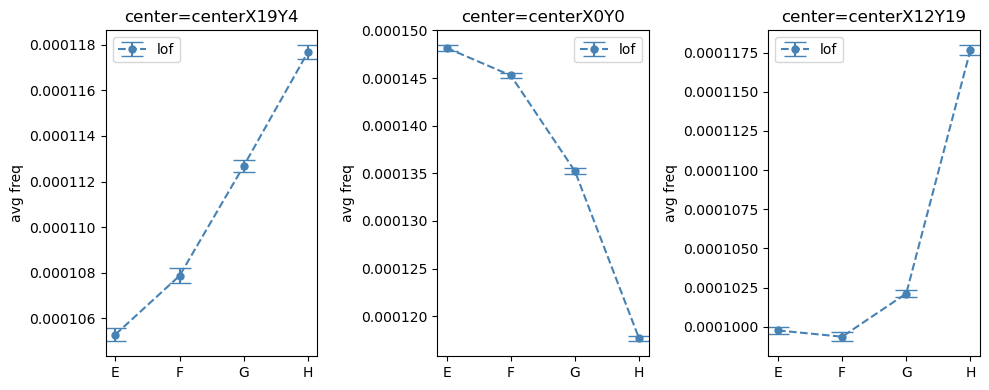

In [81]:
### SUM STATS ###

w_list_pca = ['0.0015','0.0025','0.005']
centers_pca=['centerX19Y4','centerX0Y0','centerX12Y19']
vartypes = ['lof']#['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
lt=['-','dotted','--']
labels = ['E','F','G','H']
reps=np.arange(10)+1
n_list=[100,1000,10000]
colors_vt = ['steelblue','orchid','darkorange']
fig,axs = plt.subplots(1,3,figsize=(10,4))
n=10000
for i,center in enumerate(centers_pca):
    for c,vt in enumerate(vartypes):
        
        means = []
        errors = []
    
        for idx, w in enumerate(w_list_pca+['uniformpca']):
            sfs_file = f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_{center}pca{w}_nSIR{n}_nSIRreps10.SIRsfs' if w != 'uniformpca' else f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_uniformpca_nSIR{n}_nSIRreps10.SIRsfs'
            sfs = pd.read_csv(sfs_file, delimiter=' ')
    
            # Average Frequency 
            frequency_contributions = []
            for rep in reps:
                contributions = sfs[(sfs['SIR_REP'] == rep)]
                
                p = contributions['OBS_N'] / n
                weighted_frequency = (p * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                # print(weighted_frequency)
                frequency_contributions.append(weighted_frequency)
            current_mean = np.mean(frequency_contributions)
            means.append(current_mean)
            errors.append(np.std(frequency_contributions))  
        print(means)
        axs[i].errorbar(labels, means, yerr=errors, capsize=8, markersize=5, fmt='o',linestyle='--',color=colors_vt[c],label=vt)
        axs[i].legend()
        axs[i].set_title(f'center={center}')
        # axs[i].set_ylim(0.00009000,0.000150000)
        axs[i].set_ylabel('avg freq')
        print(((means[-1]-means[0])/means[0])*100)

plt.tight_layout()
plt.show()

In [68]:
contributions

,SIR_REP,OBS_N,COUNT_SITES,Unnamed: 3
90009,10,0,49556,NaN
90010,10,1,2870,NaN
90011,10,2,268,NaN
90012,10,3,264,NaN
90013,10,4,142,NaN
...,...,...,...,...
100005,10,9996,0,NaN
100006,10,9997,0,NaN
100007,10,9998,0,NaN
100008,10,9999,0,NaN


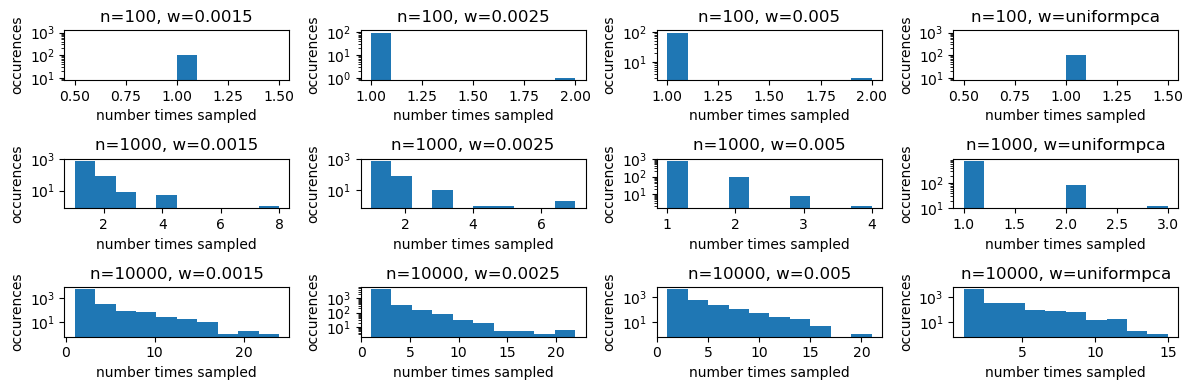

In [65]:
rep = 1
fig,ax = plt.subplots(3,4,figsize=(12,4))
vartypes = ['lof']
for i,n in enumerate(n_list):
    for c,vt in enumerate(vartypes):
        
        means = []
        errors = []
    
        for idx, w in enumerate(w_list_pca+['uniformpca']):
            ids_file = f'../empirical/subsampling_SIR_vF/results/ids/chr1_{vt}_{center_pca}pca{w}_nSIR{n}_nSIRreps10.SIRexamples' if w != 'uniformpca' else f'../empirical/subsampling_SIR_vF/results/ids/chr1_{vt}_uniformpca_nSIR{n}_nSIRreps10.SIRexamples'
            ids = pd.read_csv(ids_file, delimiter=' ',header=None)
            ids = ids[ids[1]==rep][2]
            uniq, counts = np.unique(ids, return_counts=True)
            ax[i,idx].hist(counts)
            ax[i,idx].set_title(f'n={n}, w={w}')
            ax[i,idx].set_yscale('log')
            ax[i,idx].set_xlabel('number times sampled')
            ax[i,idx].set_ylabel('occurences')
            
plt.tight_layout()
plt.show()

In [51]:
uniq, counts = np.unique(ids[2], return_counts=True)
len(uniq)

100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


50.628233555062806


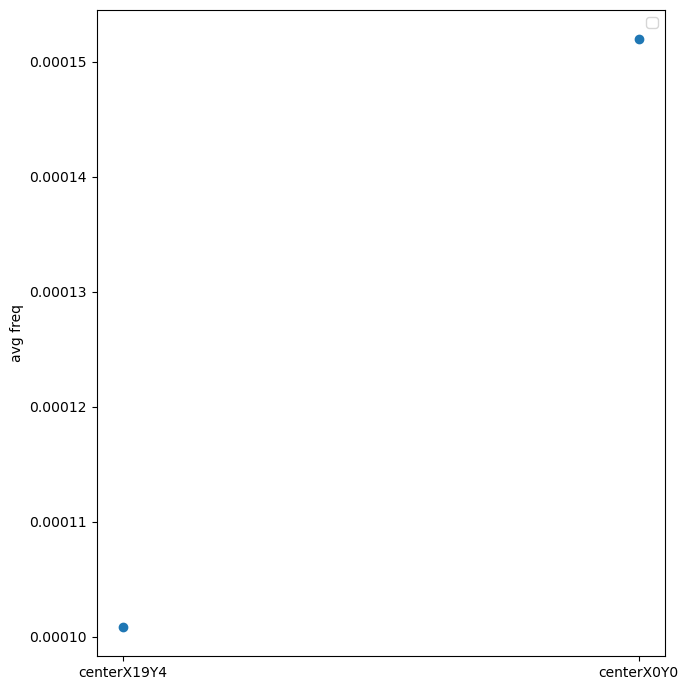

In [107]:
### SUM STATS ###

w_list_pca = ['closest1k']
w = 'closest1k'
center_pca=['centerX19Y4','centerX0Y0']
vartypes = ['lof']#['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
lt=['-','dotted','--']
# labels = ['E','F','G','H']
reps=np.arange(10)+1
n = 1000
colors_vt = ['steelblue','orchid','darkorange']
fig,axs = plt.subplots(1,1,figsize=(7,7))
means = []
for i,cent in enumerate(center_pca):
    for c,vt in enumerate(vartypes):
        sfs_file = f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_{cent}pca{w}_nSIR{n}_nSIRreps1.SIRsfs' if w != 'uniformpca' else f'../empirical/subsampling_SIR_vF/results/sfs/chr1_{vt}_uniformpca_nSIR{n}_nSIRreps10.SIRsfs'
        sfs = pd.read_csv(sfs_file, delimiter=' ')

        # Average Frequency 
        
        contributions = sfs
        p = contributions['OBS_N'] / n
        weighted_frequency = (p * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
    means.append(weighted_frequency)
            
axs.scatter(center_pca, means)
axs.legend()
        # axs[i].set_title(f'n={n}')
        # axs[i].set_ylim(0.0001,0.00014)
axs.set_ylabel('avg freq')
print(((means[-1]-means[0])/means[0])*100)

plt.tight_layout()
plt.show()

In [93]:
means

[0.0001008610086100861]

In [103]:
ids = pd.read_csv(f'../empirical/subsampling_SIR_vF/results/ids/chr1_{vt}_centerX0Y0pca{w}_nSIR{n}_nSIRreps1.SIRexamples',header=None,sep=' ')

In [104]:
ids[2].value_counts()

2
5662498    5
3469007    5
2845897    5
2710299    5
5989003    5
          ..
1142188    1
3329803    1
3943566    1
2857877    1
2072283    1
Name: count, Length: 627, dtype: int64

In [105]:
ids = pd.read_csv(f'../empirical/subsampling_SIR_vF/results/ids/chr1_{vt}_centerX19Y4pca{w}_nSIR{n}_nSIRreps1.SIRexamples',header=None,sep=' ')

In [106]:
ids[2].value_counts()

2
2940722    5
1917028    4
3278630    4
1719321    4
4800833    4
          ..
1086063    1
2448220    1
4049596    1
1212949    1
5955431    1
Name: count, Length: 617, dtype: int64